OBSERVED TREND:
1) BBC has the most negative score compared to all other news.
2) CBS and Fox has equal level of scores compared to other scores
3) Newyork Times has less negative score and stands at the top.


In [139]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time

In [140]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

In [141]:
df = pd.DataFrame({"Date":'',"@BBCNews":'',"@CBSNews":'',"@CNN":'',"@FoxNews":'',"@NYT":''}, index=[0])
df

,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT,Date
0,,,,,,


In [142]:

target_user = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@NYT']

In [143]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for user in target_user:
    public_tweets = api.user_timeline(user,count=100) 
    counter = 0
# Print Tweets
    for tweet in public_tweets:
        text = tweet['text']
        date = tweet['created_at']
        compound = analyzer.polarity_scores(text)["compound"]
        ts = time.strftime('%m-%d-%Y', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        df['Date'] = ts
        df.set_value(counter, user, compound)
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]
   
        compound_list.append(compound)
        positive_list.append(pos) 
        negative_list.append(neg)
        neutral_list.append(neu)
        counter = counter + 1
df

,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT,Date
0,-0.1027,0.6103,0,0.0258,0,03-15-2018
1,-0.6369,-0.1779,-0.2263,-0.3182,0,03-15-2018
2,0.0258,-0.6124,0,0.1531,0,03-15-2018
3,-0.0772,-0.2732,0,-0.8555,0.3818,03-15-2018
4,-0.34,0,-0.2732,0,0,03-15-2018
5,0,-0.6597,0,-0.4588,0,03-15-2018
6,-0.5719,-0.5267,0,0,0,03-15-2018
7,-0.7506,-0.886,-0.7592,-0.802,0,03-15-2018
8,-0.6249,0,0,0,-0.4404,03-15-2018
9,-0.5423,-0.4404,-0.2732,0,0.0258,03-15-2018


In [144]:
df.to_csv("New_mood_data.csv")
mean_c = df.mean()
df2 = pd.DataFrame({'News' : ["BBC","CBS","CNN","Fox","NYT"],'Percent Change' : [mean_c[0],mean_c[1],mean_c[2],mean_c[3],mean_c[4]]})
df2

,News,Percent Change
0,BBC,-0.229483
1,CBS,-0.240219
2,CNN,-0.093389
3,Fox,-0.192644
4,NYT,-0.044879


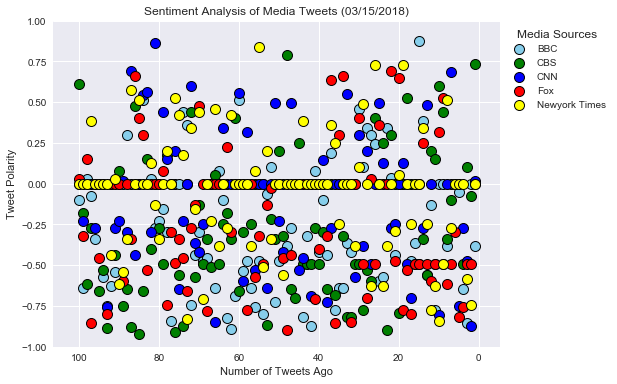

In [145]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 2}                  
sns.set(rc={'figure.figsize':(8,6)})
x = np.arange(100, 0,-1)
plt.ylim(-1,1)
a = plt.scatter(x, df['@BBCNews'], color="skyblue",edgecolors="black",linewidth='1',s=100,label = 'BBC')
b = plt.scatter(x, df['@CBSNews'], color="green",edgecolors="black",linewidth='1',s=100,label = 'CBS')
c = plt.scatter(x, df['@CNN'],color="blue",edgecolors="black",linewidth='1',s=100,label = 'CNN')
d = plt.scatter(x, df['@FoxNews'], color="red",edgecolors="black",linewidth='1',s=100,label = 'Fox')
e = plt.scatter(x, df['@NYT'], color="yellow",edgecolors="black",linewidth='1',s=100,label = 'Newyork Times') 
plt.title('Sentiment Analysis of Media Tweets (03/15/2018)')
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.savefig('Sentiment_tweet.png')
lgnd = plt.legend(bbox_to_anchor=(1, 1),title = 'Media Sources')
plt.gca().invert_xaxis()
plt.show() 

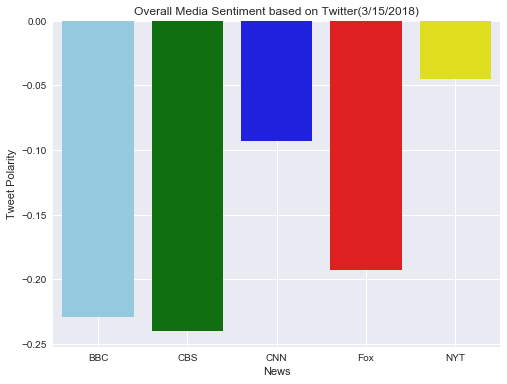

In [146]:
# the width of the bars
x=df2['News']
y=df2['Percent Change']
#Condition for setting up the color
colors = ['skyblue' if values == 'BBC' else 'green' if values == 'CBS' else 'yellow' if values == 'NYT' else 'blue' if values == 'CNN' else 'red' for values in x]
rects1 = sns.barplot(x, y, palette=colors)
plt.title('Overall Media Sentiment based on Twitter(3/15/2018)')
plt.ylabel('Tweet Polarity')
plt.savefig('Sentiment_Avg.png')
plt.grid(True)
plt.show()
